In [ ]:
!conda install tensorflow

In [ ]:
import tensorflow as tf

In [2]:
#將MNIST 手寫數字資料讀進來
mnist = tf.keras.datasets.mnist

# mnist 的load_data()會回傳已經先分割好的training data 和 testing data
# 並且將每個 pixel 的值從 Int 轉成 floating point 同時做normalize(這是很常見的preprocessing)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print(len(x_train)) #training data 總共有60000張圖片
print(x_train[0].shape) #每張圖片（拿第一張當樣本）大小為 28x28

60000
(28, 28)


In [4]:
# 開始搭建model
# 利用 "Sequential" 把每層 layer 疊起來

# input 大小為 28 x 28

# 最後的 Dense(10) 且 activation 用 softmax
# 代表最後 output 為 10 個 class （0~9）的機率
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# model每層定義好後需要經過compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# 將搭好的 model 去 fit 我們的 training data
# 並evalutate 在 testing data 上
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 29s 13ms/step - loss: 0.2977 - accuracy: 0.9132
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1430 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1070 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0870 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0757 - accuracy: 0.9760
313/313 - 3s - loss: 0.0722 - accuracy: 0.9768


[0.07222180813550949, 0.9768000245094299]

## Perception

In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt
class Perceptron(object):
    """Implements a perceptron network"""
    def __init__(self, input_size, lr=1, epochs=1000):
        self.W = np.zeros(input_size)
        self.b = np.zeros(1)
        # add one for bias
        self.epochs = epochs
        self.lr = lr
    
    def activation_fn(self, x):
        #return (x >= 0).astype(np.float32)
        return 1 if x >= 0 else 0
        #return 1/(1 + math.exp(-x))        
    
 
    def predict(self, x):
        z = self.W.T.dot(x) + self.b
        a = self.activation_fn(z)
        return a
 
    def fit(self, X, d):
        step = 0
        for _ in range(self.epochs):
            total_e = 0
            for i in range(d.shape[0]):
                #x = np.insert(X[i], 0, 1)
                x = X[i]
                print("x :" ,x )
                print("now weight: ",self.W)
                y = self.predict(x)
                print("predict y :",y)
                e = d[i] - y
                print("e = %d - %d = %d"%(d[i],y,e))
                total_e += np.abs(e)
                print("change W: "+ str(self.W) + "+" + str(self.lr) + "*" + str(e) + "*" + str(x) + "= ")
                print("change b: "+ str(self.b) + "+" + str(self.lr) + "*" + str(e) + " = ")
                self.W = self.W + self.lr * e * x
                self.b = self.b + self.lr * e
                print(self.W)
                print(self.b)
                step += 1
                print()
                

                plt.scatter(X[:,0],X[:,1],c = ['red' if i ==0 else 'blue' for i in d])
                plt.plot([-6,5],[0,0],c = 'black')
                plt.plot([0,0],[7,-3],c = 'black')
                plt.xlim(-6,5)
                plt.ylim(-3,7)
                l = np.linspace(-6,5)
                a,b = -perceptron.W[0], -perceptron.W[1]
                print(a,b)
                plt.plot(l, a*l - perceptron.b, 'g-')
                plt.show()
                     
                
            print("**********")
            print("using :", step, " epoches .")
            if total_e < 0.01:
                break

In [19]:
if __name__ == '__main__':
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    d = np.array([0, 0, 0, 1])
 
    perceptron = Perceptron(input_size=2)
    perceptron.fit(X, d)
    print(perceptron.W , perceptron.b)

x : [0 0]
now weight:  [0. 0.]
predict y : 0.5
e = 0 - 0 = 0
change W: [0. 0.]+1*-0.5*[0 0]= 
change b: [0.]+1*-0.5 = 
[0. 0.]
[-0.5]

x : [0 1]
now weight:  [0. 0.]
predict y : 0.3775406687981454
e = 0 - 0 = 0
change W: [0. 0.]+1*-0.3775406687981454*[0 1]= 
change b: [-0.5]+1*-0.3775406687981454 = 
[ 0.         -0.37754067]
[-0.87754067]

x : [1 0]
now weight:  [ 0.         -0.37754067]
predict y : 0.2936876718515876
e = 0 - 0 = 0
change W: [ 0.         -0.37754067]+1*-0.2936876718515876*[1 0]= 
change b: [-0.87754067]+1*-0.2936876718515876 = 
[-0.29368767 -0.37754067]
[-1.17122834]

x : [1 1]
now weight:  [-0.29368767 -0.37754067]
predict y : 0.1367610041937316
e = 1 - 0 = 0
change W: [-0.29368767 -0.37754067]+1*0.8632389958062684*[1 1]= 
change b: [-1.17122834]+1*0.8632389958062684 = 
[0.56955132 0.48569833]
[-0.30798934]

**********
using : 4  epoches .
x : [0 0]
now weight:  [0.56955132 0.48569833]
predict y : 0.4236055926996434
e = 0 - 0 = 0
change W: [0.56955132 0.48569833]+1*-0

now weight:  [3.61496073 3.43602823]
predict y : 0.7995241389840048
e = 1 - 0 = 0
change W: [3.61496073 3.43602823]+1*0.20047586101599524*[1 1]= 
change b: [-5.66766609]+1*0.20047586101599524 = 
[3.81543659 3.63650409]
[-5.46719023]

**********
using : 108  epoches .
x : [0 0]
now weight:  [3.81543659 3.63650409]
predict y : 0.004205321989366054
e = 0 - 0 = 0
change W: [3.81543659 3.63650409]+1*-0.004205321989366054*[0 0]= 
change b: [-5.46719023]+1*-0.004205321989366054 = 
[3.81543659 3.63650409]
[-5.47139555]

x : [0 1]
now weight:  [3.81543659 3.63650409]
predict y : 0.13765659223893478
e = 0 - 0 = 0
change W: [3.81543659 3.63650409]+1*-0.13765659223893478*[0 1]= 
change b: [-5.47139555]+1*-0.13765659223893478 = 
[3.81543659 3.4988475 ]
[-5.60905214]

x : [1 0]
now weight:  [3.81543659 3.4988475 ]
predict y : 0.14263001875402498
e = 0 - 0 = 0
change W: [3.81543659 3.4988475 ]+1*-0.14263001875402498*[1 0]= 
change b: [-5.60905214]+1*-0.14263001875402498 = 
[3.67280658 3.4988475 ]
[-5

e = 0 - 0 = 0
change W: [4.8165492  4.71287569]+1*-0.000787771318013679*[0 0]= 
change b: [-7.14551463]+1*-0.000787771318013679 = 
[4.8165492  4.71287569]
[-7.14630241]

x : [0 1]
now weight:  [4.8165492  4.71287569]
predict y : 0.0806590002277972
e = 0 - 0 = 0
change W: [4.8165492  4.71287569]+1*-0.0806590002277972*[0 1]= 
change b: [-7.14630241]+1*-0.0806590002277972 = 
[4.8165492  4.63221669]
[-7.22696141]

x : [1 0]
now weight:  [4.8165492  4.63221669]
predict y : 0.08238215214887301
e = 0 - 0 = 0
change W: [4.8165492  4.63221669]+1*-0.08238215214887301*[1 0]= 
change b: [-7.22696141]+1*-0.08238215214887301 = 
[4.73416705 4.63221669]
[-7.30934356]

x : [1 1]
now weight:  [4.73416705 4.63221669]
predict y : 0.8866570595188753
e = 1 - 0 = 0
change W: [4.73416705 4.63221669]+1*0.1133429404811247*[1 1]= 
change b: [-7.30934356]+1*0.1133429404811247 = 
[4.84750999 4.74555963]
[-7.19600062]

**********
using : 212  epoches .
x : [0 0]
now weight:  [4.84750999 4.74555963]
predict y : 0.00

predict y : 0.00025539637919526164
e = 0 - 0 = 0
change W: [5.51684282 5.44562446]+1*-0.00025539637919526164*[0 0]= 
change b: [-8.27243836]+1*-0.00025539637919526164 = 
[5.51684282 5.44562446]
[-8.27269376]

x : [0 1]
now weight:  [5.51684282 5.44562446]
predict y : 0.055878810150123644
e = 0 - 0 = 0
change W: [5.51684282 5.44562446]+1*-0.055878810150123644*[0 1]= 
change b: [-8.27269376]+1*-0.055878810150123644 = 
[5.51684282 5.38974565]
[-8.32857257]

x : [1 0]
now weight:  [5.51684282 5.38974565]
predict y : 0.05669360366396911
e = 0 - 0 = 0
change W: [5.51684282 5.38974565]+1*-0.05669360366396911*[1 0]= 
change b: [-8.32857257]+1*-0.05669360366396911 = 
[5.46014921 5.38974565]
[-8.38526617]

x : [1 1]
now weight:  [5.46014921 5.38974565]
predict y : 0.9216246587743505
e = 1 - 0 = 0
change W: [5.46014921 5.38974565]+1*0.07837534122564949*[1 1]= 
change b: [-8.38526617]+1*0.07837534122564949 = 
[5.53852455 5.46812099]
[-8.30689083]

**********
using : 320  epoches .
x : [0 0]
now we

x : [0 0]
now weight:  [5.98076872 5.92501448]
predict y : 0.00012277284990488464
e = 0 - 0 = 0
change W: [5.98076872 5.92501448]+1*-0.00012277284990488464*[0 0]= 
change b: [-9.00505188]+1*-0.00012277284990488464 = 
[5.98076872 5.92501448]
[-9.00517465]

x : [0 1]
now weight:  [5.98076872 5.92501448]
predict y : 0.043933087252728424
e = 0 - 0 = 0
change W: [5.98076872 5.92501448]+1*-0.043933087252728424*[0 1]= 
change b: [-9.00517465]+1*-0.043933087252728424 = 
[5.98076872 5.88108139]
[-9.04910774]

x : [1 0]
now weight:  [5.98076872 5.88108139]
predict y : 0.04443229630554314
e = 0 - 0 = 0
change W: [5.98076872 5.88108139]+1*-0.04443229630554314*[1 0]= 
change b: [-9.04910774]+1*-0.04443229630554314 = 
[5.93633642 5.88108139]
[-9.09354003]

x : [1 1]
now weight:  [5.93633642 5.88108139]
predict y : 0.938421000544766
e = 1 - 0 = 0
change W: [5.93633642 5.88108139]+1*0.06157899945523404*[1 1]= 
change b: [-9.09354003]+1*0.06157899945523404 = 
[5.99791542 5.94266039]
[-9.03196104]

****

change b: [-9.67140621]+1*-0.0360164958473998 = 
[6.34829258 6.3034614 ]
[-9.7074227]

x : [1 1]
now weight:  [6.34829258 6.3034614 ]
predict y : 0.9499948836971722
e = 1 - 0 = 0
change W: [6.34829258 6.3034614 ]+1*0.05000511630282778*[1 1]= 
change b: [-9.7074227]+1*0.05000511630282778 = 
[6.3982977  6.35346651]
[-9.65741759]

**********
using : 520  epoches .
x : [0 0]
now weight:  [6.3982977  6.35346651]
predict y : 6.394536340270493e-05
e = 0 - 0 = 0
change W: [6.3982977  6.35346651]+1*-6.394536340270493e-05*[0 0]= 
change b: [-9.65741759]+1*-6.394536340270493e-05 = 
[6.3982977  6.35346651]
[-9.65748153]

x : [0 1]
now weight:  [6.3982977  6.35346651]
predict y : 0.03543370695223691
e = 0 - 0 = 0
change W: [6.3982977  6.35346651]+1*-0.03543370695223691*[0 1]= 
change b: [-9.65748153]+1*-0.03543370695223691 = 
[6.3982977 6.3180328]
[-9.69291524]

x : [1 0]
now weight:  [6.3982977 6.3180328]
predict y : 0.03575630150311546
e = 0 - 0 = 0
change W: [6.3982977 6.3180328]+1*-0.0357563015

using : 620  epoches .
x : [0 0]
now weight:  [6.71927966 6.68132115]
predict y : 3.886590377788102e-05
e = 0 - 0 = 0
change W: [6.71927966 6.68132115]+1*-3.886590377788102e-05*[0 0]= 
change b: [-10.15535433]+1*-3.886590377788102e-05 = 
[6.71927966 6.68132115]
[-10.1553932]

x : [0 1]
now weight:  [6.71927966 6.68132115]
predict y : 0.03005903130922388
e = 0 - 0 = 0
change W: [6.71927966 6.68132115]+1*-0.03005903130922388*[0 1]= 
change b: [-10.1553932]+1*-0.03005903130922388 = 
[6.71927966 6.65126212]
[-10.18545223]

x : [1 0]
now weight:  [6.71927966 6.65126212]
predict y : 0.030290201452777478
e = 0 - 0 = 0
change W: [6.71927966 6.65126212]+1*-0.030290201452777478*[1 0]= 
change b: [-10.18545223]+1*-0.030290201452777478 = 
[6.68898946 6.65126212]
[-10.21574243]

x : [1 1]
now weight:  [6.68898946 6.65126212]
predict y : 0.957892477873765
e = 1 - 0 = 0
change W: [6.68898946 6.65126212]+1*0.04210752212623503*[1 1]= 
change b: [-10.21574243]+1*0.04210752212623503 = 
[6.73109698 6.6933

change W: [7.00571793 6.97297295]+1*-2.497694184111891e-05*[0 0]= 
change b: [-10.59753251]+1*-2.497694184111891e-05 = 
[7.00571793 6.97297295]
[-10.59755748]

x : [0 1]
now weight:  [7.00571793 6.97297295]
predict y : 0.025967863772657713
e = 0 - 0 = 0
change W: [7.00571793 6.97297295]+1*-0.025967863772657713*[0 1]= 
change b: [-10.59755748]+1*-0.025967863772657713 = 
[7.00571793 6.94700509]
[-10.62352535]

x : [1 0]
now weight:  [7.00571793 6.94700509]
predict y : 0.026139832744844837
e = 0 - 0 = 0
change W: [7.00571793 6.94700509]+1*-0.026139832744844837*[1 0]= 
change b: [-10.62352535]+1*-0.026139832744844837 = 
[6.9795781  6.94700509]
[-10.64966518]

x : [1 1]
now weight:  [6.9795781  6.94700509]
predict y : 0.9636284179506619
e = 1 - 0 = 0
change W: [6.9795781  6.94700509]+1*0.0363715820493381*[1 1]= 
change b: [-10.64966518]+1*0.0363715820493381 = 
[7.01594968 6.98337667]
[-10.6132936]

**********
using : 728  epoches .
x : [0 0]
now weight:  [7.01594968 6.98337667]
predict y : 

[-11.02828403]

x : [1 1]
now weight:  [7.23297603 7.20431468]
predict y : 0.9679848335928803
e = 1 - 0 = 0
change W: [7.23297603 7.20431468]+1*0.032015166407119655*[1 1]= 
change b: [-11.02828403]+1*0.032015166407119655 = 
[7.2649912  7.23632984]
[-10.99626887]

**********
using : 832  epoches .
x : [0 0]
now weight:  [7.2649912  7.23632984]
predict y : 1.6763852410793777e-05
e = 0 - 0 = 0
change W: [7.2649912  7.23632984]+1*-1.6763852410793777e-05*[0 0]= 
change b: [-10.99626887]+1*-1.6763852410793777e-05 = 
[7.2649912  7.23632984]
[-10.99628563]

x : [0 1]
now weight:  [7.2649912  7.23632984]
predict y : 0.02275492661604445
e = 0 - 0 = 0
change W: [7.2649912  7.23632984]+1*-0.02275492661604445*[0 1]= 
change b: [-10.99628563]+1*-0.02275492661604445 = 
[7.2649912  7.21357492]
[-11.01904056]

x : [1 0]
now weight:  [7.2649912  7.21357492]
predict y : 0.022886639603580256
e = 0 - 0 = 0
change W: [7.2649912  7.21357492]+1*-0.022886639603580256*[1 0]= 
change b: [-11.01904056]+1*-0.02288

change b: [-11.30649809]+1*-0.020780890141720663 = 
[7.4329956 7.4070847]
[-11.32727898]

x : [1 1]
now weight:  [7.4329956 7.4070847]
predict y : 0.9710498187821489
e = 1 - 0 = 0
change W: [7.4329956 7.4070847]+1*0.02895018121785109*[1 1]= 
change b: [-11.32727898]+1*0.02895018121785109 = 
[7.46194578 7.43603488]
[-11.2983288]

**********
using : 924  epoches .
x : [0 0]
now weight:  [7.46194578 7.43603488]
predict y : 1.2393465538090357e-05
e = 0 - 0 = 0
change W: [7.46194578 7.43603488]+1*-1.2393465538090357e-05*[0 0]= 
change b: [-11.2983288]+1*-1.2393465538090357e-05 = 
[7.46194578 7.43603488]
[-11.2983412]

x : [0 1]
now weight:  [7.46194578 7.43603488]
predict y : 0.02058674362035813
e = 0 - 0 = 0
change W: [7.46194578 7.43603488]+1*-0.02058674362035813*[0 1]= 
change b: [-11.2983412]+1*-0.02058674362035813 = 
[7.46194578 7.41544813]
[-11.31892794]

x : [1 0]
now weight:  [7.46194578 7.41544813]
predict y : 0.02069436870383479
e = 0 - 0 = 0
change W: [7.46194578 7.41544813]+1*-0

predict y : 0.01865568749769907
e = 0 - 0 = 0
change W: [7.65597403 7.63250921]+1*-0.01865568749769907*[0 1]= 
change b: [-11.59528153]+1*-0.01865568749769907 = 
[7.65597403 7.61385352]
[-11.61393722]

x : [1 0]
now weight:  [7.65597403 7.61385352]
predict y : 0.01874393543219489
e = 0 - 0 = 0
change W: [7.65597403 7.61385352]+1*-0.01874393543219489*[1 0]= 
change b: [-11.61393722]+1*-0.01874393543219489 = 
[7.63723009 7.61385352]
[-11.63268115]

x : [1 1]
now weight:  [7.63723009 7.61385352]
predict y : 0.9738753107068284
e = 1 - 0 = 0
change W: [7.63723009 7.61385352]+1*0.026124689293171577*[1 1]= 
change b: [-11.63268115]+1*0.026124689293171577 = 
[7.66335478 7.63997821]
[-11.60655647]

**********
using : 1028  epoches .
x : [0 0]
now weight:  [7.66335478 7.63997821]
predict y : 9.10610425908627e-06
e = 0 - 0 = 0
change W: [7.66335478 7.63997821]+1*-9.10610425908627e-06*[0 0]= 
change b: [-11.60655647]+1*-9.10610425908627e-06 = 
[7.66335478 7.63997821]
[-11.60656557]

x : [0 1]
now 

e = 0 - 0 = 0
change W: [7.83949713 7.81812911]+1*-6.95793837117645e-06*[0 0]= 
change b: [-11.87562038]+1*-6.95793837117645e-06 = 
[7.83949713 7.81812911]
[-11.87562734]

x : [0 1]
now weight:  [7.83949713 7.81812911]
predict y : 0.016998287975728756
e = 0 - 0 = 0
change W: [7.83949713 7.81812911]+1*-0.016998287975728756*[0 1]= 
change b: [-11.87562734]+1*-0.016998287975728756 = 
[7.83949713 7.80113082]
[-11.89262563]

x : [1 0]
now weight:  [7.83949713 7.80113082]
predict y : 0.01707145770639545
e = 0 - 0 = 0
change W: [7.83949713 7.80113082]+1*-0.01707145770639545*[1 0]= 
change b: [-11.89262563]+1*-0.01707145770639545 = 
[7.82242567 7.80113082]
[-11.90969708]

x : [1 1]
now weight:  [7.82242567 7.80113082]
predict y : 0.9761971538901759
e = 1 - 0 = 0
change W: [7.82242567 7.80113082]+1*0.023802846109824083*[1 1]= 
change b: [-11.90969708]+1*0.023802846109824083 = 
[7.84622852 7.82493367]
[-11.88589424]

**********
using : 1132  epoches .
x : [0 0]
now weight:  [7.84622852 7.8249336

using : 1232  epoches .
x : [0 0]
now weight:  [8.00751305 7.9878971 ]
predict y : 5.385049275768702e-06
e = 0 - 0 = 0
change W: [8.00751305 7.9878971 ]+1*-5.385049275768702e-06*[0 0]= 
change b: [-12.13187871]+1*-5.385049275768702e-06 = 
[8.00751305 7.9878971 ]
[-12.1318841]

x : [0 1]
now weight:  [8.00751305 7.9878971 ]
predict y : 0.015611896754024416
e = 0 - 0 = 0
change W: [8.00751305 7.9878971 ]+1*-0.015611896754024416*[0 1]= 
change b: [-12.1318841]+1*-0.015611896754024416 = 
[8.00751305 7.9722852 ]
[-12.14749599]

x : [1 0]
now weight:  [8.00751305 7.9722852 ]
predict y : 0.015673551284853243
e = 0 - 0 = 0
change W: [8.00751305 7.9722852 ]+1*-0.015673551284853243*[1 0]= 
change b: [-12.14749599]+1*-0.015673551284853243 = 
[7.9918395 7.9722852]
[-12.16316954]

x : [1 1]
now weight:  [7.9918395 7.9722852]
predict y : 0.978139162562134
e = 1 - 0 = 0
change W: [7.9918395 7.9722852]+1*0.021860837437866043*[1 1]= 
change b: [-12.16316954]+1*0.021860837437866043 = 
[8.01370034 7.9941

change W: [8.14217362 8.12404366]+1*0.020271175243136152*[1 1]= 
change b: [-12.38814139]+1*0.020271175243136152 = 
[8.16244479 8.14431483]
[-12.36787021]

**********
using : 1336  epoches .
x : [0 0]
now weight:  [8.16244479 8.14431483]
predict y : 4.253048806178225e-06
e = 0 - 0 = 0
change W: [8.16244479 8.14431483]+1*-4.253048806178225e-06*[0 0]= 
change b: [-12.36787021]+1*-4.253048806178225e-06 = 
[8.16244479 8.14431483]
[-12.36787447]

x : [0 1]
now weight:  [8.16244479 8.14431483]
predict y : 0.014434994799621454
e = 0 - 0 = 0
change W: [8.16244479 8.14431483]+1*-0.014434994799621454*[0 1]= 
change b: [-12.36787447]+1*-0.014434994799621454 = 
[8.16244479 8.12987984]
[-12.38230946]

x : [1 0]
now weight:  [8.16244479 8.12987984]
predict y : 0.014487656091303392
e = 0 - 0 = 0
change W: [8.16244479 8.12987984]+1*-0.014487656091303392*[1 0]= 
change b: [-12.38230946]+1*-0.014487656091303392 = 
[8.14795714 8.12987984]
[-12.39679712]

x : [1 1]
now weight:  [8.14795714 8.12987984]
pre

x : [1 0]
now weight:  [8.30618765 8.27591062]
predict y : 0.013468889917703316
e = 0 - 0 = 0
change W: [8.30618765 8.27591062]+1*-0.013468889917703316*[1 0]= 
change b: [-12.59999993]+1*-0.013468889917703316 = 
[8.29271876 8.27591062]
[-12.61346882]

x : [1 1]
now weight:  [8.29271876 8.27591062]
predict y : 0.9812044472439311
e = 1 - 0 = 0
change W: [8.29271876 8.27591062]+1*0.018795552756068923*[1 1]= 
change b: [-12.61346882]+1*0.018795552756068923 = 
[8.31151431 8.29470618]
[-12.59467327]

**********
using : 1444  epoches .
x : [0 0]
now weight:  [8.31151431 8.29470618]
predict y : 3.390013486313311e-06
e = 0 - 0 = 0
change W: [8.31151431 8.29470618]+1*-3.390013486313311e-06*[0 0]= 
change b: [-12.59467327]+1*-3.390013486313311e-06 = 
[8.31151431 8.29470618]
[-12.59467666]

x : [0 1]
now weight:  [8.31151431 8.29470618]
predict y : 0.013387307698329309
e = 0 - 0 = 0
change W: [8.31151431 8.29470618]+1*-0.013387307698329309*[0 1]= 
change b: [-12.59467666]+1*-0.013387307698329309 =

change W: [8.42766807 8.4119623 ]+1*0.017564657467196154*[1 1]= 
change b: [-12.81548462]+1*0.017564657467196154 = 
[8.44523273 8.42952695]
[-12.79791996]

**********
using : 1548  epoches .
x : [0 0]
now weight:  [8.44523273 8.42952695]
predict y : 2.7665134093168047e-06
e = 0 - 0 = 0
change W: [8.44523273 8.42952695]+1*-2.7665134093168047e-06*[0 0]= 
change b: [-12.79791996]+1*-2.7665134093168047e-06 = 
[8.44523273 8.42952695]
[-12.79792273]

x : [0 1]
now weight:  [8.44523273 8.42952695]
predict y : 0.01251299325331531
e = 0 - 0 = 0
change W: [8.44523273 8.42952695]+1*-0.01251299325331531*[0 1]= 
change b: [-12.79792273]+1*-0.01251299325331531 = 
[8.44523273 8.41701396]
[-12.81043572]

x : [1 0]
now weight:  [8.44523273 8.41701396]
predict y : 0.012552506060873051
e = 0 - 0 = 0
change W: [8.44523273 8.41701396]+1*-0.012552506060873051*[1 0]= 
change b: [-12.81043572]+1*-0.012552506060873051 = 
[8.43268022 8.41701396]
[-12.82298823]

x : [1 1]
now weight:  [8.43268022 8.41701396]
pre

change W: [8.55405357 8.53931424]+1*0.016485320182774044*[1 1]= 
change b: [-13.00470555]+1*0.016485320182774044 = 
[8.57053889 8.55579956]
[-12.98822023]

**********
using : 1652  epoches .
x : [0 0]
now weight:  [8.57053889 8.55579956]
predict y : 2.287107779558345e-06
e = 0 - 0 = 0
change W: [8.57053889 8.55579956]+1*-2.287107779558345e-06*[0 0]= 
change b: [-12.98822023]+1*-2.287107779558345e-06 = 
[8.57053889 8.55579956]
[-12.98822252]

x : [0 1]
now weight:  [8.57053889 8.55579956]
predict y : 0.011746046852901752
e = 0 - 0 = 0
change W: [8.57053889 8.55579956]+1*-0.011746046852901752*[0 1]= 
change b: [-12.98822252]+1*-0.011746046852901752 = 
[8.57053889 8.54405351]
[-12.99996856]

x : [1 0]
now weight:  [8.57053889 8.54405351]
predict y : 0.01178084399120959
e = 0 - 0 = 0
change W: [8.57053889 8.54405351]+1*-0.01178084399120959*[1 0]= 
change b: [-12.99996856]+1*-0.01178084399120959 = 
[8.55875805 8.54405351]
[-13.01174941]

x : [1 1]
now weight:  [8.55875805 8.54405351]
predic

[8.68402287 8.67010674]
[-13.16044295]

x : [0 1]
now weight:  [8.68402287 8.67010674]
predict y : 0.011092449417548354
e = 0 - 0 = 0
change W: [8.68402287 8.67010674]+1*-0.011092449417548354*[0 1]= 
change b: [-13.16044295]+1*-0.011092449417548354 = 
[8.68402287 8.65901429]
[-13.1715354]

x : [1 0]
now weight:  [8.68402287 8.65901429]
predict y : 0.011123466278997261
e = 0 - 0 = 0
change W: [8.68402287 8.65901429]+1*-0.011123466278997261*[1 0]= 
change b: [-13.1715354]+1*-0.011123466278997261 = 
[8.6728994  8.65901429]
[-13.18265886]

x : [1 1]
now weight:  [8.6728994  8.65901429]
predict y : 0.9844688539366766
e = 1 - 0 = 0
change W: [8.6728994  8.65901429]+1*0.015531146063323398*[1 1]= 
change b: [-13.18265886]+1*0.015531146063323398 = 
[8.68843055 8.67454544]
[-13.16712772]

**********
using : 1756  epoches .
x : [0 0]
now weight:  [8.68843055 8.67454544]
predict y : 1.9124419440896913e-06
e = 0 - 0 = 0
change W: [8.68843055 8.67454544]+1*-1.9124419440896913e-06*[0 0]= 
change b: [

predict y : 1.6153910654536462e-06
e = 0 - 0 = 0
change W: [8.79973763 8.78661302]+1*-1.6153910654536462e-06*[0 0]= 
change b: [-13.33593187]+1*-1.6153910654536462e-06 = 
[8.79973763 8.78661302]
[-13.33593348]

x : [0 1]
now weight:  [8.79973763 8.78661302]
predict y : 0.010463739980845805
e = 0 - 0 = 0
change W: [8.79973763 8.78661302]+1*-0.010463739980845805*[0 1]= 
change b: [-13.33593348]+1*-0.010463739980845805 = 
[8.79973763 8.77614928]
[-13.34639722]

x : [1 0]
now weight:  [8.79973763 8.77614928]
predict y : 0.010491327230579285
e = 0 - 0 = 0
change W: [8.79973763 8.77614928]+1*-0.010491327230579285*[1 0]= 
change b: [-13.34639722]+1*-0.010491327230579285 = 
[8.78924631 8.77614928]
[-13.35688855]

x : [1 1]
now weight:  [8.78924631 8.77614928]
predict y : 0.9853492848853189
e = 1 - 0 = 0
change W: [8.78924631 8.77614928]+1*0.014650715114681079*[1 1]= 
change b: [-13.35688855]+1*0.014650715114681079 = 
[8.80389702 8.7908    ]
[-13.34223784]

**********
using : 1864  epoches .
x 

[8.90910338 8.89668497]
[-13.50169431]

x : [0 1]
now weight:  [8.90910338 8.89668497]
predict y : 0.009902567008474262
e = 0 - 0 = 0
change W: [8.90910338 8.89668497]+1*-0.009902567008474262*[0 1]= 
change b: [-13.50169431]+1*-0.009902567008474262 = 
[8.90910338 8.88678241]
[-13.51159688]

x : [1 0]
now weight:  [8.90910338 8.88678241]
predict y : 0.009927264024081313
e = 0 - 0 = 0
change W: [8.90910338 8.88678241]+1*-0.009927264024081313*[1 0]= 
change b: [-13.51159688]+1*-0.009927264024081313 = 
[8.89917612 8.88678241]
[-13.52152414]

x : [1 1]
now weight:  [8.89917612 8.88678241]
predict y : 0.9861351202880452
e = 1 - 0 = 0
change W: [8.89917612 8.88678241]+1*0.013864879711954825*[1 1]= 
change b: [-13.52152414]+1*0.013864879711954825 = 
[8.913041   8.90064729]
[-13.50765926]

**********
using : 1972  epoches .
x : [0 0]
now weight:  [8.913041   8.90064729]
predict y : 1.3604968106403887e-06
e = 0 - 0 = 0
change W: [8.913041   8.90064729]+1*-1.3604968106403887e-06*[0 0]= 
change b:

now weight:  [9.00903632 8.99722958]
predict y : 1.1763699711194817e-06
e = 0 - 0 = 0
change W: [9.00903632 8.99722958]+1*-1.1763699711194817e-06*[0 0]= 
change b: [-13.65307598]+1*-1.1763699711194817e-06 = 
[9.00903632 8.99722958]
[-13.65307716]

x : [0 1]
now weight:  [9.00903632 8.99722958]
predict y : 0.009416342483499679
e = 0 - 0 = 0
change W: [9.00903632 8.99722958]+1*-0.009416342483499679*[0 1]= 
change b: [-13.65307716]+1*-0.009416342483499679 = 
[9.00903632 8.98781323]
[-13.6624935]

x : [1 0]
now weight:  [9.00903632 8.98781323]
predict y : 0.009438665498509283
e = 0 - 0 = 0
change W: [9.00903632 8.98781323]+1*-0.009438665498509283*[1 0]= 
change b: [-13.6624935]+1*-0.009438665498509283 = 
[8.99959765 8.98781323]
[-13.67193216]

x : [1 1]
now weight:  [8.99959765 8.98781323]
predict y : 0.9868159882081412
e = 1 - 0 = 0
change W: [8.99959765 8.98781323]+1*0.013184011791858796*[1 1]= 
change b: [-13.67193216]+1*0.013184011791858796 = 
[9.01278166 9.00099725]
[-13.65874815]

**

now weight:  [9.1148939  9.09477446]
predict y : 0.008947542814448282
e = 0 - 0 = 0
change W: [9.1148939  9.09477446]+1*-0.008947542814448282*[1 0]= 
change b: [-13.82228242]+1*-0.008947542814448282 = 
[9.10594636 9.09477446]
[-13.83122996]

x : [1 1]
now weight:  [9.10594636 9.09477446]
predict y : 0.9875005307859495
e = 1 - 0 = 0
change W: [9.10594636 9.09477446]+1*0.01249946921405054*[1 1]= 
change b: [-13.83122996]+1*0.01249946921405054 = 
[9.11844583 9.10727393]
[-13.8187305]

**********
using : 2192  epoches .
x : [0 0]
now weight:  [9.11844583 9.10727393]
predict y : 9.967842474713652e-07
e = 0 - 0 = 0
change W: [9.11844583 9.10727393]+1*-9.967842474713652e-07*[0 0]= 
change b: [-13.8187305]+1*-9.967842474713652e-07 = 
[9.11844583 9.10727393]
[-13.81873149]

x : [0 1]
now weight:  [9.11844583 9.10727393]
predict y : 0.008911532597933302
e = 0 - 0 = 0
change W: [9.11844583 9.10727393]+1*-0.008911532597933302*[0 1]= 
change b: [-13.81873149]+1*-0.008911532597933302 = 
[9.11844583 

change W: [9.20184815 9.19113693]+1*-0.008545096086669255*[0 1]= 
change b: [-13.94495283]+1*-0.008545096086669255 = 
[9.20184815 9.18259183]
[-13.95349793]

x : [1 0]
now weight:  [9.20184815 9.18259183]
predict y : 0.008563467193260408
e = 0 - 0 = 0
change W: [9.20184815 9.18259183]+1*-0.008563467193260408*[1 0]= 
change b: [-13.95349793]+1*-0.008563467193260408 = 
[9.19328468 9.18259183]
[-13.9620614]

x : [1 1]
now weight:  [9.19328468 9.18259183]
predict y : 0.9880359778307185
e = 1 - 0 = 0
change W: [9.19328468 9.18259183]+1*0.011964022169281496*[1 1]= 
change b: [-13.9620614]+1*0.011964022169281496 = 
[9.2052487  9.19455586]
[-13.95009737]

**********
using : 2292  epoches .
x : [0 0]
now weight:  [9.2052487  9.19455586]
predict y : 8.740762283757293e-07
e = 0 - 0 = 0
change W: [9.2052487  9.19455586]+1*-8.740762283757293e-07*[0 0]= 
change b: [-13.95009737]+1*-8.740762283757293e-07 = 
[9.2052487  9.19455586]
[-13.95009825]

x : [0 1]
now weight:  [9.2052487  9.19455586]
predict

x : [1 0]
now weight:  [9.28190317 9.26340847]
predict y : 0.008224581654248801
e = 0 - 0 = 0
change W: [9.28190317 9.26340847]+1*-0.008224581654248801*[1 0]= 
change b: [-14.07427242]+1*-0.008224581654248801 = 
[9.27367859 9.26340847]
[-14.08249701]

x : [1 1]
now weight:  [9.27367859 9.26340847]
predict y : 0.988508504959653
e = 1 - 0 = 0
change W: [9.27367859 9.26340847]+1*0.011491495040346966*[1 1]= 
change b: [-14.08249701]+1*0.011491495040346966 = 
[9.28517008 9.27489996]
[-14.07100551]

**********
using : 2388  epoches .
x : [0 0]
now weight:  [9.28517008 9.27489996]
predict y : 7.745324461474685e-07
e = 0 - 0 = 0
change W: [9.28517008 9.27489996]+1*-7.745324461474685e-07*[0 0]= 
change b: [-14.07100551]+1*-7.745324461474685e-07 = 
[9.28517008 9.27489996]
[-14.07100628]

x : [0 1]
now weight:  [9.28517008 9.27489996]
predict y : 0.008194154578835794
e = 0 - 0 = 0
change W: [9.28517008 9.27489996]+1*-0.008194154578835794*[0 1]= 
change b: [-14.07100628]+1*-0.008194154578835794 = 

[9.3682849  9.35843652]
[-14.19670161]

**********
using : 2492  epoches .
x : [0 0]
now weight:  [9.3682849  9.35843652]
predict y : 6.830469159163663e-07
e = 0 - 0 = 0
change W: [9.3682849  9.35843652]+1*-6.830469159163663e-07*[0 0]= 
change b: [-14.19670161]+1*-6.830469159163663e-07 = 
[9.3682849  9.35843652]
[-14.19670229]

x : [0 1]
now weight:  [9.3682849  9.35843652]
predict y : 0.007858532921946304
e = 0 - 0 = 0
change W: [9.3682849  9.35843652]+1*-0.007858532921946304*[0 1]= 
change b: [-14.19670229]+1*-0.007858532921946304 = 
[9.3682849  9.35057799]
[-14.20456082]

x : [1 0]
now weight:  [9.3682849  9.35057799]
predict y : 0.007874062473411927
e = 0 - 0 = 0
change W: [9.3682849  9.35057799]+1*-0.007874062473411927*[1 0]= 
change b: [-14.20456082]+1*-0.007874062473411927 = 
[9.36041083 9.35057799]
[-14.21243488]

x : [1 1]
now weight:  [9.36041083 9.35057799]
predict y : 0.9889973330106567
e = 1 - 0 = 0
change W: [9.36041083 9.35057799]+1*0.011002666989343268*[1 1]= 
change b:

using : 2596  epoches .
x : [0 0]
now weight:  [9.44807566 9.43861572]
predict y : 6.054271898239585e-07
e = 0 - 0 = 0
change W: [9.44807566 9.43861572]+1*-6.054271898239585e-07*[0 0]= 
change b: [-14.31733092]+1*-6.054271898239585e-07 = 
[9.44807566 9.43861572]
[-14.31733153]

x : [0 1]
now weight:  [9.44807566 9.43861572]
predict y : 0.007549350096551664
e = 0 - 0 = 0
change W: [9.44807566 9.43861572]+1*-0.007549350096551664*[0 1]= 
change b: [-14.31733153]+1*-0.007549350096551664 = 
[9.44807566 9.43106637]
[-14.32488088]

x : [1 0]
now weight:  [9.44807566 9.43106637]
predict y : 0.007563678366430057
e = 0 - 0 = 0
change W: [9.44807566 9.43106637]+1*-0.007563678366430057*[1 0]= 
change b: [-14.32488088]+1*-0.007563678366430057 = 
[9.44051198 9.43106637]
[-14.33244456]

x : [1 1]
now weight:  [9.44051198 9.43106637]
predict y : 0.9894302569689201
e = 1 - 0 = 0
change W: [9.44051198 9.43106637]+1*0.010569743031079937*[1 1]= 
change b: [-14.33244456]+1*0.010569743031079937 = 
[9.451081

x : [1 0]
now weight:  [9.52190136 9.50551286]
predict y : 0.0072874879473592835
e = 0 - 0 = 0
change W: [9.52190136 9.50551286]+1*-0.0072874879473592835*[1 0]= 
change b: [-14.43618357]+1*-0.0072874879473592835 = 
[9.51461387 9.50551286]
[-14.44347105]

x : [1 1]
now weight:  [9.51461387 9.50551286]
predict y : 0.9898155410227834
e = 1 - 0 = 0
change W: [9.51461387 9.50551286]+1*0.010184458977216648*[1 1]= 
change b: [-14.44347105]+1*0.010184458977216648 = 
[9.52479833 9.51569732]
[-14.43328659]

**********
using : 2700  epoches .
x : [0 0]
now weight:  [9.52479833 9.51569732]
predict y : 5.391418472354406e-07
e = 0 - 0 = 0
change W: [9.52479833 9.51569732]+1*-5.391418472354406e-07*[0 0]= 
change b: [-14.43328659]+1*-5.391418472354406e-07 = 
[9.52479833 9.51569732]
[-14.43328713]

x : [0 1]
now weight:  [9.52479833 9.51569732]
predict y : 0.0072635984364633616
e = 0 - 0 = 0
change W: [9.52479833 9.51569732]+1*-0.0072635984364633616*[0 1]= 
change b: [-14.43328713]+1*-0.007263598436463

predict y : 0.007018397516657204
e = 0 - 0 = 0
change W: [9.59309323 9.58430017]+1*-0.007018397516657204*[0 1]= 
change b: [-14.53647739]+1*-0.007018397516657204 = 
[9.59309323 9.57728177]
[-14.54349578]

x : [1 0]
now weight:  [9.59309323 9.57728177]
predict y : 0.007030776267062825
e = 0 - 0 = 0
change W: [9.59309323 9.57728177]+1*-0.007030776267062825*[1 0]= 
change b: [-14.54349578]+1*-0.007030776267062825 = 
[9.58606246 9.57728177]
[-14.55052656]

x : [1 1]
now weight:  [9.58606246 9.57728177]
predict y : 0.9901736975716126
e = 1 - 0 = 0
change W: [9.58606246 9.57728177]+1*0.009826302428387446*[1 1]= 
change b: [-14.55052656]+1*0.009826302428387446 = 
[9.59588876 9.58710807]
[-14.54070026]

**********
using : 2800  epoches .
x : [0 0]
now weight:  [9.59588876 9.58710807]
predict y : 4.842324673757803e-07
e = 0 - 0 = 0
change W: [9.59588876 9.58710807]+1*-4.842324673757803e-07*[0 0]= 
change b: [-14.54070026]+1*-4.842324673757803e-07 = 
[9.59588876 9.58710807]
[-14.54070074]

x : [

predict y : 4.3476182098486654e-07
e = 0 - 0 = 0
change W: [9.6672312  9.65876055]+1*-4.3476182098486654e-07*[0 0]= 
change b: [-14.64846706]+1*-4.3476182098486654e-07 = 
[9.6672312  9.65876055]
[-14.64846749]

x : [0 1]
now weight:  [9.6672312  9.65876055]
predict y : 0.0067616283654747585
e = 0 - 0 = 0
change W: [9.6672312  9.65876055]+1*-0.0067616283654747585*[0 1]= 
change b: [-14.64846749]+1*-0.0067616283654747585 = 
[9.6672312  9.65199892]
[-14.65522912]

x : [1 0]
now weight:  [9.6672312  9.65199892]
predict y : 0.006773115708365809
e = 0 - 0 = 0
change W: [9.6672312  9.65199892]+1*-0.006773115708365809*[1 0]= 
change b: [-14.65522912]+1*-0.006773115708365809 = 
[9.66045809 9.65199892]
[-14.66200224]

x : [1 1]
now weight:  [9.66045809 9.65199892]
predict y : 0.9905332218432673
e = 1 - 0 = 0
change W: [9.66045809 9.65199892]+1*0.009466778156732691*[1 1]= 
change b: [-14.66200224]+1*0.009466778156732691 = 
[9.66992487 9.6614657 ]
[-14.65253546]

**********
using : 2908  epoches .

now weight:  [9.73611146 9.72139814]
predict y : 0.006542254354704922
e = 0 - 0 = 0
change W: [9.73611146 9.72139814]+1*-0.006542254354704922*[1 0]= 
change b: [-14.75902118]+1*-0.006542254354704922 = 
[9.72956921 9.72139814]
[-14.76556344]

x : [1 1]
now weight:  [9.72956921 9.72139814]
predict y : 0.9908553894796149
e = 1 - 0 = 0
change W: [9.72956921 9.72139814]+1*0.009144610520385066*[1 1]= 
change b: [-14.76556344]+1*0.009144610520385066 = 
[9.73871382 9.73054275]
[-14.75641883]

**********
using : 3012  epoches .
x : [0 0]
now weight:  [9.73871382 9.73054275]
predict y : 3.9027304857815955e-07
e = 0 - 0 = 0
change W: [9.73871382 9.73054275]+1*-3.9027304857815955e-07*[0 0]= 
change b: [-14.75641883]+1*-3.9027304857815955e-07 = 
[9.73871382 9.73054275]
[-14.75641922]

x : [0 1]
now weight:  [9.73871382 9.73054275]
predict y : 0.0065230003197660385
e = 0 - 0 = 0
change W: [9.73871382 9.73054275]+1*-0.0065230003197660385*[0 1]= 
change b: [-14.75641922]+1*-0.0065230003197660385 = 
[9

[9.80269398 9.794782  ]
[-14.85301895]

x : [0 1]
now weight:  [9.80269398 9.794782  ]
predict y : 0.006316603778354101
e = 0 - 0 = 0
change W: [9.80269398 9.794782  ]+1*-0.006316603778354101*[0 1]= 
change b: [-14.85301895]+1*-0.006316603778354101 = 
[9.80269398 9.78846539]
[-14.85933555]

x : [1 0]
now weight:  [9.80269398 9.78846539]
predict y : 0.0063266254245820525
e = 0 - 0 = 0
change W: [9.80269398 9.78846539]+1*-0.0063266254245820525*[1 0]= 
change b: [-14.85933555]+1*-0.0063266254245820525 = 
[9.79636736 9.78846539]
[-14.86566218]

x : [1 1]
now weight:  [9.79636736 9.78846539]
predict y : 0.991156332184552
e = 1 - 0 = 0
change W: [9.79636736 9.78846539]+1*0.008843667815447986*[1 1]= 
change b: [-14.86566218]+1*0.008843667815447986 = 
[9.80521103 9.79730906]
[-14.85681851]

**********
using : 3116  epoches .
x : [0 0]
now weight:  [9.80521103 9.79730906]
predict y : 3.529925570415889e-07
e = 0 - 0 = 0
change W: [9.80521103 9.79730906]+1*-3.529925570415889e-07*[0 0]= 
change b:

change W: [9.85855484 9.85089541]+1*0.008572422128665713*[1 1]= 
change b: [-14.95885468]+1*0.008572422128665713 = 
[9.86712727 9.85946784]
[-14.95028226]

**********
using : 3216  epoches .
x : [0 0]
now weight:  [9.86712727 9.85946784]
predict y : 3.2149540780589407e-07
e = 0 - 0 = 0
change W: [9.86712727 9.85946784]+1*-3.2149540780589407e-07*[0 0]= 
change b: [-14.95028226]+1*-3.2149540780589407e-07 = 
[9.86712727 9.85946784]
[-14.95028258]

x : [0 1]
now weight:  [9.86712727 9.85946784]
predict y : 0.006115376799001572
e = 0 - 0 = 0
change W: [9.86712727 9.85946784]+1*-0.006115376799001572*[0 1]= 
change b: [-14.95028258]+1*-0.006115376799001572 = 
[9.86712727 9.85335246]
[-14.95639795]

x : [1 0]
now weight:  [9.86712727 9.85335246]
predict y : 0.006124768681952646
e = 0 - 0 = 0
change W: [9.86712727 9.85335246]+1*-0.006124768681952646*[1 0]= 
change b: [-14.95639795]+1*-0.006124768681952646 = 
[9.8610025  9.85335246]
[-14.96252272]

x : [1 1]
now weight:  [9.8610025  9.85335246]


predict y : 0.9916925541082333
e = 1 - 0 = 0
change W: [9.9212384  9.91381589]+1*0.008307445891766685*[1 1]= 
change b: [-15.05279337]+1*0.008307445891766685 = 
[9.92954585 9.92212334]
[-15.04448593]

**********
using : 3320  epoches .
x : [0 0]
now weight:  [9.92954585 9.92212334]
predict y : 2.92592138011239e-07
e = 0 - 0 = 0
change W: [9.92954585 9.92212334]+1*-2.92592138011239e-07*[0 0]= 
change b: [-15.04448593]+1*-2.92592138011239e-07 = 
[9.92954585 9.92212334]
[-15.04448622]

x : [0 1]
now weight:  [9.92954585 9.92212334]
predict y : 0.005926585127690493
e = 0 - 0 = 0
change W: [9.92954585 9.92212334]+1*-0.005926585127690493*[0 1]= 
change b: [-15.04448622]+1*-0.005926585127690493 = 
[9.92954585 9.91619675]
[-15.0504128]

x : [1 0]
now weight:  [9.92954585 9.91619675]
predict y : 0.005935404827746081
e = 0 - 0 = 0
change W: [9.92954585 9.91619675]+1*-0.005935404827746081*[1 0]= 
change b: [-15.0504128]+1*-0.005935404827746081 = 
[9.92361044 9.91619675]
[-15.05634821]

x : [1 1]


[-15.14387482]

x : [1 1]
now weight:  [9.98201365 9.97481383]
predict y : 0.99194162753228
e = 1 - 0 = 0
change W: [9.98201365 9.97481383]+1*0.00805837246772001*[1 1]= 
change b: [-15.14387482]+1*0.00805837246772001 = 
[9.99007202 9.9828722 ]
[-15.13581645]

**********
using : 3424  epoches .
x : [0 0]
now weight:  [9.99007202 9.9828722 ]
predict y : 2.670535294064114e-07
e = 0 - 0 = 0
change W: [9.99007202 9.9828722 ]+1*-2.670535294064114e-07*[0 0]= 
change b: [-15.13581645]+1*-2.670535294064114e-07 = 
[9.99007202 9.9828722 ]
[-15.13581671]

x : [0 1]
now weight:  [9.99007202 9.9828722 ]
predict y : 0.005749110025569468
e = 0 - 0 = 0
change W: [9.99007202 9.9828722 ]+1*-0.005749110025569468*[0 1]= 
change b: [-15.13581671]+1*-0.005749110025569468 = 
[9.99007202 9.97712309]
[-15.14156582]

x : [1 0]
now weight:  [9.99007202 9.97712309]
predict y : 0.005757408308974242
e = 0 - 0 = 0
change W: [9.99007202 9.97712309]+1*-0.005757408308974242*[1 0]= 
change b: [-15.14156582]+1*-0.00575740

predict y : 0.992176188797315
e = 1 - 0 = 0
change W: [10.04099343 10.03400332]+1*0.00782381120268505*[1 1]= 
change b: [-15.23226786]+1*0.00782381120268505 = 
[10.04881724 10.04182713]
[-15.22444404]

**********
using : 3528  epoches .
x : [0 0]
now weight:  [10.04881724 10.04182713]
predict y : 2.4440374448939596e-07
e = 0 - 0 = 0
change W: [10.04881724 10.04182713]+1*-2.4440374448939596e-07*[0 0]= 
change b: [-15.22444404]+1*-2.4440374448939596e-07 = 
[10.04881724 10.04182713]
[-15.22444429]

x : [0 1]
now weight:  [10.04881724 10.04182713]
predict y : 0.005581963091226263
e = 0 - 0 = 0
change W: [10.04881724 10.04182713]+1*-0.005581963091226263*[0 1]= 
change b: [-15.22444429]+1*-0.005581963091226263 = 
[10.04881724 10.03624517]
[-15.23002625]

x : [1 0]
now weight:  [10.04881724 10.03624517]
predict y : 0.005589784889343154
e = 0 - 0 = 0
change W: [10.04881724 10.03624517]+1*-0.005589784889343154*[1 0]= 
change b: [-15.23002625]+1*-0.005589784889343154 = 
[10.04322746 10.03624517]

x : [0 0]
now weight:  [10.10588343 10.09909114]
predict y : 2.242454861957021e-07
e = 0 - 0 = 0
change W: [10.10588343 10.09909114]+1*-2.242454861957021e-07*[0 0]= 
change b: [-15.31052424]+1*-2.242454861957021e-07 = 
[10.10588343 10.09909114]
[-15.31052446]

x : [0 1]
now weight:  [10.10588343 10.09909114]
predict y : 0.005424267811616748
e = 0 - 0 = 0
change W: [10.10588343 10.09909114]+1*-0.005424267811616748*[0 1]= 
change b: [-15.31052446]+1*-0.005424267811616748 = 
[10.10588343 10.09366688]
[-15.31594873]

x : [1 0]
now weight:  [10.10588343 10.09366688]
predict y : 0.005431653035997441
e = 0 - 0 = 0
change W: [10.10588343 10.09366688]+1*-0.005431653035997441*[1 0]= 
change b: [-15.31594873]+1*-0.005431653035997441 = 
[10.10045177 10.09366688]
[-15.32138039]

x : [1 1]
now weight:  [10.10045177 10.09366688]
predict y : 0.9924057319008047
e = 1 - 0 = 0
change W: [10.10045177 10.09366688]+1*0.007594268099195278*[1 1]= 
change b: [-15.32138039]+1*0.007594268099195278 = 
[10.1080460

e = 0 - 0 = 0
change W: [10.15925835 10.152646  ]+1*-0.005280824153192627*[0 1]= 
change b: [-15.39102428]+1*-0.005280824153192627 = 
[10.15925835 10.14736517]
[-15.39630511]

x : [1 0]
now weight:  [10.15925835 10.14736517]
predict y : 0.005287823190112819
e = 0 - 0 = 0
change W: [10.15925835 10.14736517]+1*-0.005287823190112819*[1 0]= 
change b: [-15.39630511]+1*-0.005287823190112819 = 
[10.15397053 10.14736517]
[-15.40159293]

x : [1 1]
now weight:  [10.15397053 10.14736517]
predict y : 0.9926065711266232
e = 1 - 0 = 0
change W: [10.15397053 10.14736517]+1*0.007393428873376795*[1 1]= 
change b: [-15.40159293]+1*0.007393428873376795 = 
[10.16136395 10.1547586 ]
[-15.3941995]

**********
using : 3736  epoches .
x : [0 0]
now weight:  [10.16136395 10.1547586 ]
predict y : 2.0624527737980322e-07
e = 0 - 0 = 0
change W: [10.16136395 10.1547586 ]+1*-2.0624527737980322e-07*[0 0]= 
change b: [-15.3941995]+1*-2.0624527737980322e-07 = 
[10.16136395 10.1547586 ]
[-15.39419971]

x : [0 1]
now w

change b: [-15.47251061]+1*-0.005139480900762077 = 
[10.21329522 10.20172066]
[-15.47765009]

x : [1 0]
now weight:  [10.21329522 10.20172066]
predict y : 0.005146109587862751
e = 0 - 0 = 0
change W: [10.21329522 10.20172066]+1*-0.005146109587862751*[1 0]= 
change b: [-15.47765009]+1*-0.005146109587862751 = 
[10.20814911 10.20172066]
[-15.4827962]

x : [1 1]
now weight:  [10.20814911 10.20172066]
predict y : 0.992804468823353
e = 1 - 0 = 0
change W: [10.20814911 10.20172066]+1*0.007195531176646952*[1 1]= 
change b: [-15.4827962]+1*0.007195531176646952 = 
[10.21534464 10.2089162 ]
[-15.47560067]

**********
using : 3840  epoches .
x : [0 0]
now weight:  [10.21534464 10.2089162 ]
predict y : 1.9012181139026166e-07
e = 0 - 0 = 0
change W: [10.21534464 10.2089162 ]+1*-1.9012181139026166e-07*[0 0]= 
change b: [-15.47560067]+1*-1.9012181139026166e-07 = 
[10.21534464 10.2089162 ]
[-15.47560086]

x : [0 1]
now weight:  [10.21534464 10.2089162 ]
predict y : 0.0051341956769177825
e = 0 - 0 = 0
c

[10.26089654 10.25463577]
[-15.56185613]

x : [1 1]
now weight:  [10.26089654 10.25463577]
predict y : 0.9929920412167776
e = 1 - 0 = 0
change W: [10.26089654 10.25463577]+1*0.007007958783222357*[1 1]= 
change b: [-15.56185613]+1*0.007007958783222357 = 
[10.26790449 10.26164373]
[-15.55484817]

**********
using : 3944  epoches .
x : [0 0]
now weight:  [10.26790449 10.26164373]
predict y : 1.756366712312327e-07
e = 0 - 0 = 0
change W: [10.26790449 10.26164373]+1*-1.756366712312327e-07*[0 0]= 
change b: [-15.55484817]+1*-1.756366712312327e-07 = 
[10.26790449 10.26164373]
[-15.55484834]

x : [0 1]
now weight:  [10.26790449 10.26164373]
predict y : 0.005000498557932315
e = 0 - 0 = 0
change W: [10.26790449 10.26164373]+1*-0.005000498557932315*[0 1]= 
change b: [-15.55484834]+1*-0.005000498557932315 = 
[10.26790449 10.25664323]
[-15.55984884]

x : [1 0]
now weight:  [10.26790449 10.25664323]
predict y : 0.005006772933995676
e = 0 - 0 = 0
change W: [10.26790449 10.25664323]+1*-0.0050067729339

In [17]:
test = [0.9,0.8]
pred = perceptron.predict(test)
print(pred)

0


x : [3 6]
now weight:  [0. 0.]
predict y : 1
e = 0 - 1 = -1
change W: [0. 0.]+1*-1*[3 6]= 
change b: [0.]+1*-1 = 
[-3. -6.]
[-1.]

3.0 6.0


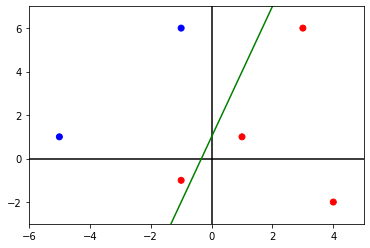

x : [1 1]
now weight:  [-3. -6.]
predict y : 0
e = 0 - 0 = 0
change W: [-3. -6.]+1*0*[1 1]= 
change b: [-1.]+1*0 = 
[-3. -6.]
[-1.]

3.0 6.0


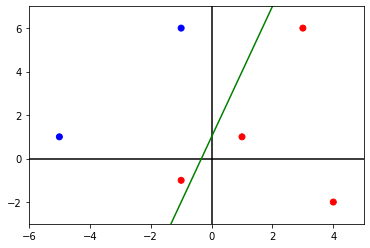

x : [ 4 -2]
now weight:  [-3. -6.]
predict y : 0
e = 0 - 0 = 0
change W: [-3. -6.]+1*0*[ 4 -2]= 
change b: [-1.]+1*0 = 
[-3. -6.]
[-1.]

3.0 6.0


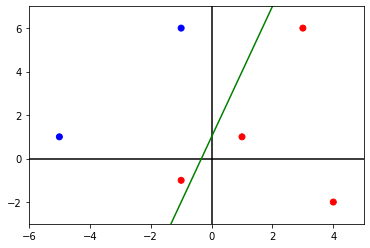

x : [-1 -1]
now weight:  [-3. -6.]
predict y : 1
e = 0 - 1 = -1
change W: [-3. -6.]+1*-1*[-1 -1]= 
change b: [-1.]+1*-1 = 
[-2. -5.]
[-2.]

2.0 5.0


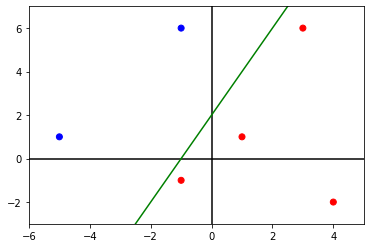

x : [-1  6]
now weight:  [-2. -5.]
predict y : 0
e = 1 - 0 = 1
change W: [-2. -5.]+1*1*[-1  6]= 
change b: [-2.]+1*1 = 
[-3.  1.]
[-1.]

3.0 -1.0


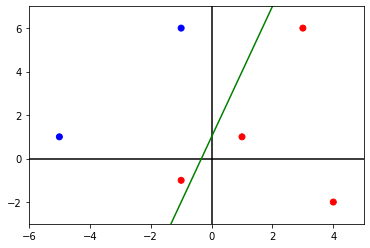

x : [-5  1]
now weight:  [-3.  1.]
predict y : 1
e = 1 - 1 = 0
change W: [-3.  1.]+1*0*[-5  1]= 
change b: [-1.]+1*0 = 
[-3.  1.]
[-1.]

3.0 -1.0


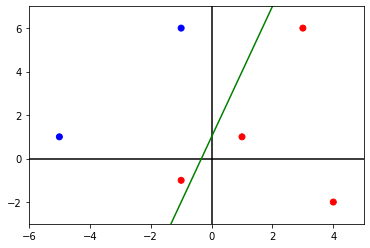

**********
using : 6  epoches .
x : [3 6]
now weight:  [-3.  1.]
predict y : 0
e = 0 - 0 = 0
change W: [-3.  1.]+1*0*[3 6]= 
change b: [-1.]+1*0 = 
[-3.  1.]
[-1.]

3.0 -1.0


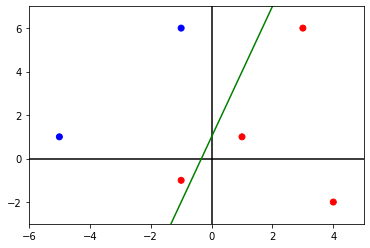

x : [1 1]
now weight:  [-3.  1.]
predict y : 0
e = 0 - 0 = 0
change W: [-3.  1.]+1*0*[1 1]= 
change b: [-1.]+1*0 = 
[-3.  1.]
[-1.]

3.0 -1.0


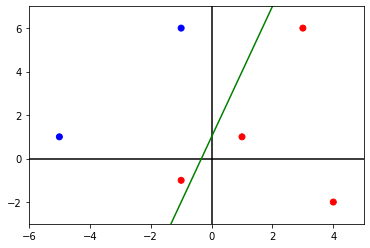

x : [ 4 -2]
now weight:  [-3.  1.]
predict y : 0
e = 0 - 0 = 0
change W: [-3.  1.]+1*0*[ 4 -2]= 
change b: [-1.]+1*0 = 
[-3.  1.]
[-1.]

3.0 -1.0


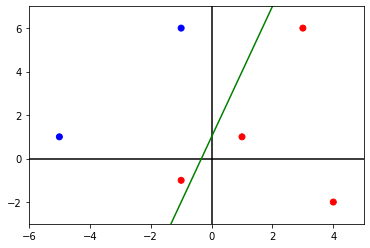

x : [-1 -1]
now weight:  [-3.  1.]
predict y : 1
e = 0 - 1 = -1
change W: [-3.  1.]+1*-1*[-1 -1]= 
change b: [-1.]+1*-1 = 
[-2.  2.]
[-2.]

2.0 -2.0


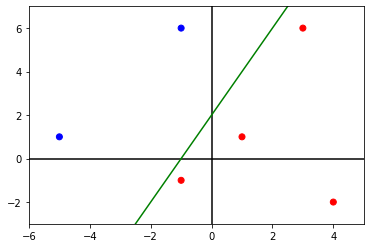

x : [-1  6]
now weight:  [-2.  2.]
predict y : 1
e = 1 - 1 = 0
change W: [-2.  2.]+1*0*[-1  6]= 
change b: [-2.]+1*0 = 
[-2.  2.]
[-2.]

2.0 -2.0


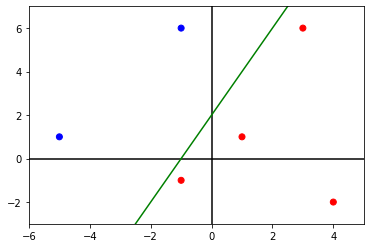

x : [-5  1]
now weight:  [-2.  2.]
predict y : 1
e = 1 - 1 = 0
change W: [-2.  2.]+1*0*[-5  1]= 
change b: [-2.]+1*0 = 
[-2.  2.]
[-2.]

2.0 -2.0


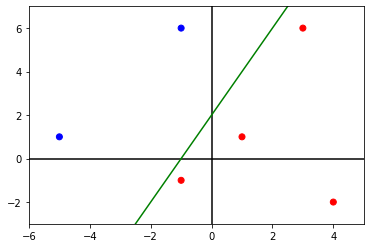

**********
using : 12  epoches .
x : [3 6]
now weight:  [-2.  2.]
predict y : 1
e = 0 - 1 = -1
change W: [-2.  2.]+1*-1*[3 6]= 
change b: [-2.]+1*-1 = 
[-5. -4.]
[-3.]

5.0 4.0


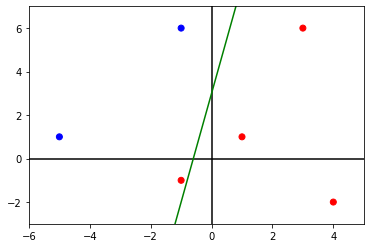

x : [1 1]
now weight:  [-5. -4.]
predict y : 0
e = 0 - 0 = 0
change W: [-5. -4.]+1*0*[1 1]= 
change b: [-3.]+1*0 = 
[-5. -4.]
[-3.]

5.0 4.0


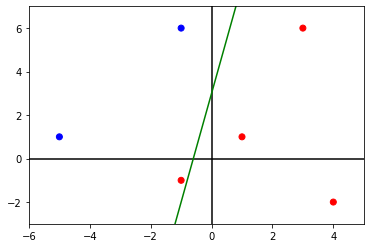

x : [ 4 -2]
now weight:  [-5. -4.]
predict y : 0
e = 0 - 0 = 0
change W: [-5. -4.]+1*0*[ 4 -2]= 
change b: [-3.]+1*0 = 
[-5. -4.]
[-3.]

5.0 4.0


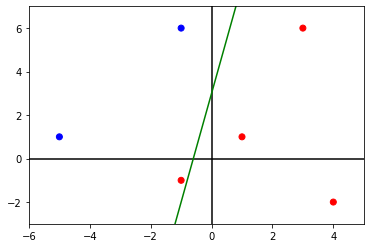

x : [-1 -1]
now weight:  [-5. -4.]
predict y : 1
e = 0 - 1 = -1
change W: [-5. -4.]+1*-1*[-1 -1]= 
change b: [-3.]+1*-1 = 
[-4. -3.]
[-4.]

4.0 3.0


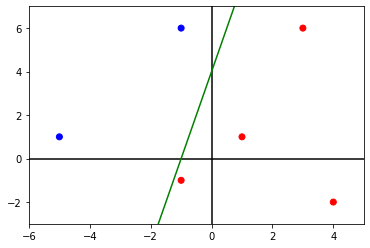

x : [-1  6]
now weight:  [-4. -3.]
predict y : 0
e = 1 - 0 = 1
change W: [-4. -3.]+1*1*[-1  6]= 
change b: [-4.]+1*1 = 
[-5.  3.]
[-3.]

5.0 -3.0


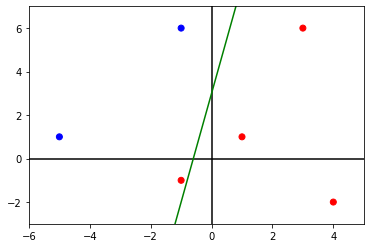

x : [-5  1]
now weight:  [-5.  3.]
predict y : 1
e = 1 - 1 = 0
change W: [-5.  3.]+1*0*[-5  1]= 
change b: [-3.]+1*0 = 
[-5.  3.]
[-3.]

5.0 -3.0


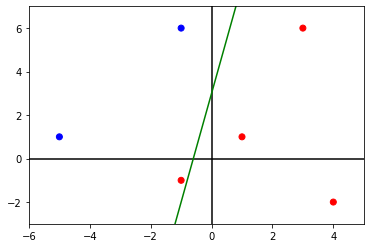

**********
using : 18  epoches .
x : [3 6]
now weight:  [-5.  3.]
predict y : 1
e = 0 - 1 = -1
change W: [-5.  3.]+1*-1*[3 6]= 
change b: [-3.]+1*-1 = 
[-8. -3.]
[-4.]

8.0 3.0


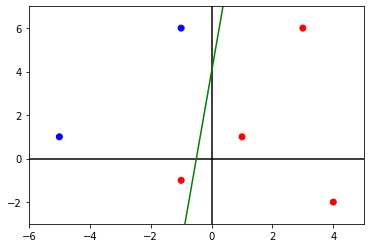

x : [1 1]
now weight:  [-8. -3.]
predict y : 0
e = 0 - 0 = 0
change W: [-8. -3.]+1*0*[1 1]= 
change b: [-4.]+1*0 = 
[-8. -3.]
[-4.]

8.0 3.0


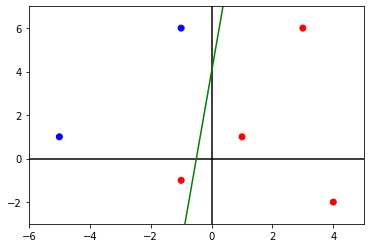

x : [ 4 -2]
now weight:  [-8. -3.]
predict y : 0
e = 0 - 0 = 0
change W: [-8. -3.]+1*0*[ 4 -2]= 
change b: [-4.]+1*0 = 
[-8. -3.]
[-4.]

8.0 3.0


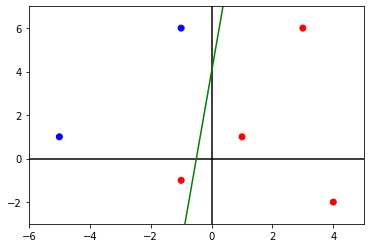

x : [-1 -1]
now weight:  [-8. -3.]
predict y : 1
e = 0 - 1 = -1
change W: [-8. -3.]+1*-1*[-1 -1]= 
change b: [-4.]+1*-1 = 
[-7. -2.]
[-5.]

7.0 2.0


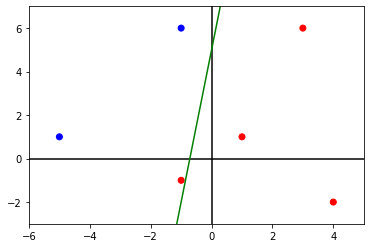

x : [-1  6]
now weight:  [-7. -2.]
predict y : 0
e = 1 - 0 = 1
change W: [-7. -2.]+1*1*[-1  6]= 
change b: [-5.]+1*1 = 
[-8.  4.]
[-4.]

8.0 -4.0


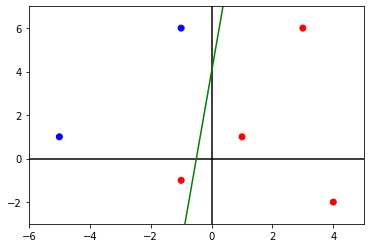

x : [-5  1]
now weight:  [-8.  4.]
predict y : 1
e = 1 - 1 = 0
change W: [-8.  4.]+1*0*[-5  1]= 
change b: [-4.]+1*0 = 
[-8.  4.]
[-4.]

8.0 -4.0


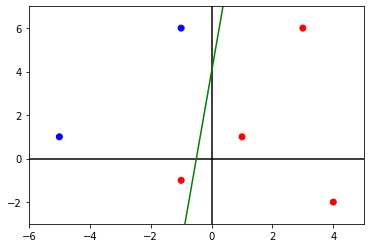

**********
using : 24  epoches .
x : [3 6]
now weight:  [-8.  4.]
predict y : 0
e = 0 - 0 = 0
change W: [-8.  4.]+1*0*[3 6]= 
change b: [-4.]+1*0 = 
[-8.  4.]
[-4.]

8.0 -4.0


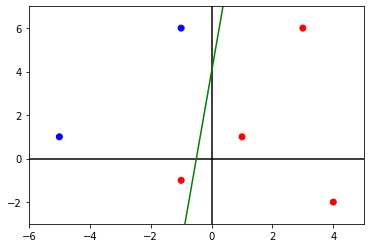

x : [1 1]
now weight:  [-8.  4.]
predict y : 0
e = 0 - 0 = 0
change W: [-8.  4.]+1*0*[1 1]= 
change b: [-4.]+1*0 = 
[-8.  4.]
[-4.]

8.0 -4.0


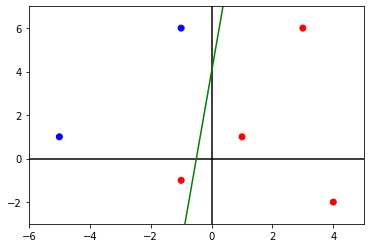

x : [ 4 -2]
now weight:  [-8.  4.]
predict y : 0
e = 0 - 0 = 0
change W: [-8.  4.]+1*0*[ 4 -2]= 
change b: [-4.]+1*0 = 
[-8.  4.]
[-4.]

8.0 -4.0


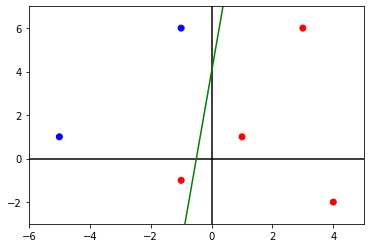

x : [-1 -1]
now weight:  [-8.  4.]
predict y : 1
e = 0 - 1 = -1
change W: [-8.  4.]+1*-1*[-1 -1]= 
change b: [-4.]+1*-1 = 
[-7.  5.]
[-5.]

7.0 -5.0


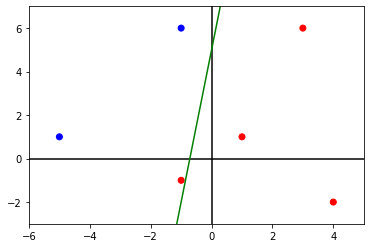

x : [-1  6]
now weight:  [-7.  5.]
predict y : 1
e = 1 - 1 = 0
change W: [-7.  5.]+1*0*[-1  6]= 
change b: [-5.]+1*0 = 
[-7.  5.]
[-5.]

7.0 -5.0


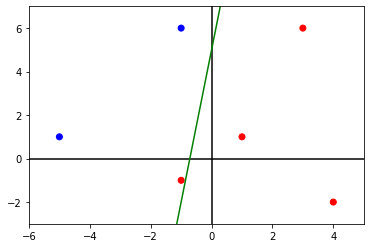

x : [-5  1]
now weight:  [-7.  5.]
predict y : 1
e = 1 - 1 = 0
change W: [-7.  5.]+1*0*[-5  1]= 
change b: [-5.]+1*0 = 
[-7.  5.]
[-5.]

7.0 -5.0


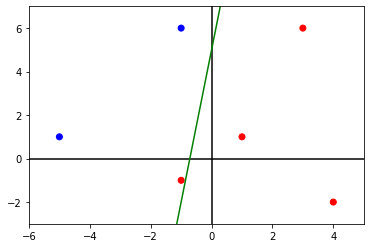

**********
using : 30  epoches .
x : [3 6]
now weight:  [-7.  5.]
predict y : 1
e = 0 - 1 = -1
change W: [-7.  5.]+1*-1*[3 6]= 
change b: [-5.]+1*-1 = 
[-10.  -1.]
[-6.]

10.0 1.0


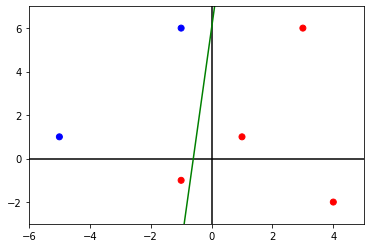

x : [1 1]
now weight:  [-10.  -1.]
predict y : 0
e = 0 - 0 = 0
change W: [-10.  -1.]+1*0*[1 1]= 
change b: [-6.]+1*0 = 
[-10.  -1.]
[-6.]

10.0 1.0


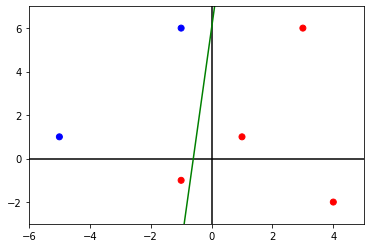

x : [ 4 -2]
now weight:  [-10.  -1.]
predict y : 0
e = 0 - 0 = 0
change W: [-10.  -1.]+1*0*[ 4 -2]= 
change b: [-6.]+1*0 = 
[-10.  -1.]
[-6.]

10.0 1.0


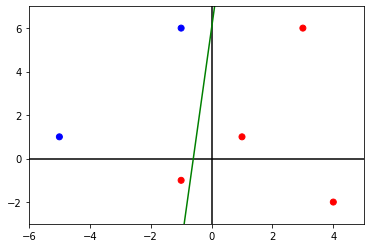

x : [-1 -1]
now weight:  [-10.  -1.]
predict y : 1
e = 0 - 1 = -1
change W: [-10.  -1.]+1*-1*[-1 -1]= 
change b: [-6.]+1*-1 = 
[-9.  0.]
[-7.]

9.0 -0.0


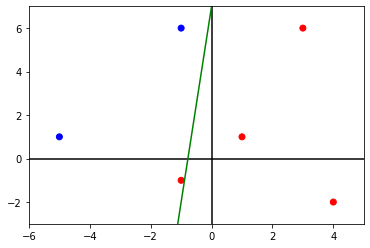

x : [-1  6]
now weight:  [-9.  0.]
predict y : 1
e = 1 - 1 = 0
change W: [-9.  0.]+1*0*[-1  6]= 
change b: [-7.]+1*0 = 
[-9.  0.]
[-7.]

9.0 -0.0


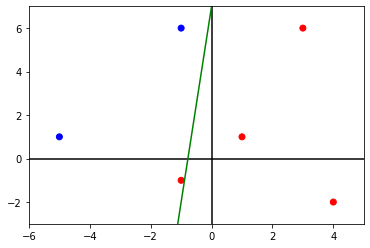

x : [-5  1]
now weight:  [-9.  0.]
predict y : 1
e = 1 - 1 = 0
change W: [-9.  0.]+1*0*[-5  1]= 
change b: [-7.]+1*0 = 
[-9.  0.]
[-7.]

9.0 -0.0


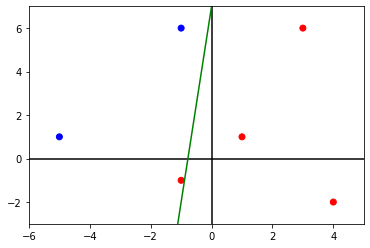

**********
using : 36  epoches .
x : [3 6]
now weight:  [-9.  0.]
predict y : 0
e = 0 - 0 = 0
change W: [-9.  0.]+1*0*[3 6]= 
change b: [-7.]+1*0 = 
[-9.  0.]
[-7.]

9.0 -0.0


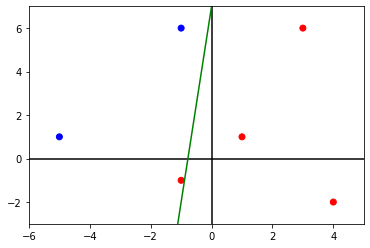

x : [1 1]
now weight:  [-9.  0.]
predict y : 0
e = 0 - 0 = 0
change W: [-9.  0.]+1*0*[1 1]= 
change b: [-7.]+1*0 = 
[-9.  0.]
[-7.]

9.0 -0.0


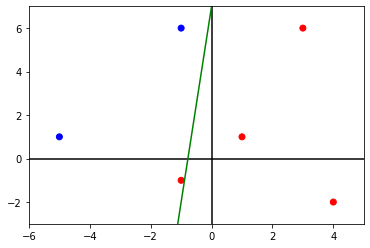

x : [ 4 -2]
now weight:  [-9.  0.]
predict y : 0
e = 0 - 0 = 0
change W: [-9.  0.]+1*0*[ 4 -2]= 
change b: [-7.]+1*0 = 
[-9.  0.]
[-7.]

9.0 -0.0


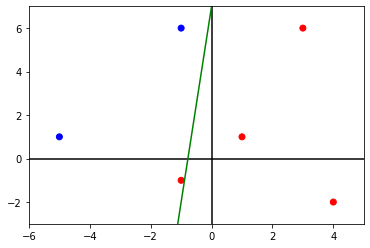

x : [-1 -1]
now weight:  [-9.  0.]
predict y : 1
e = 0 - 1 = -1
change W: [-9.  0.]+1*-1*[-1 -1]= 
change b: [-7.]+1*-1 = 
[-8.  1.]
[-8.]

8.0 -1.0


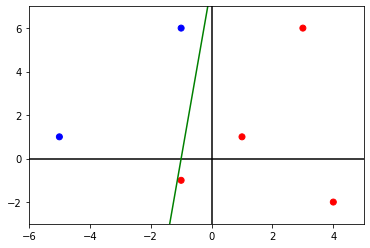

x : [-1  6]
now weight:  [-8.  1.]
predict y : 1
e = 1 - 1 = 0
change W: [-8.  1.]+1*0*[-1  6]= 
change b: [-8.]+1*0 = 
[-8.  1.]
[-8.]

8.0 -1.0


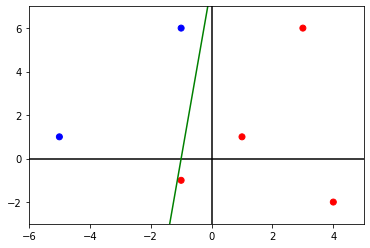

x : [-5  1]
now weight:  [-8.  1.]
predict y : 1
e = 1 - 1 = 0
change W: [-8.  1.]+1*0*[-5  1]= 
change b: [-8.]+1*0 = 
[-8.  1.]
[-8.]

8.0 -1.0


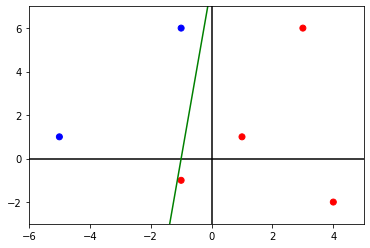

**********
using : 42  epoches .
x : [3 6]
now weight:  [-8.  1.]
predict y : 0
e = 0 - 0 = 0
change W: [-8.  1.]+1*0*[3 6]= 
change b: [-8.]+1*0 = 
[-8.  1.]
[-8.]

8.0 -1.0


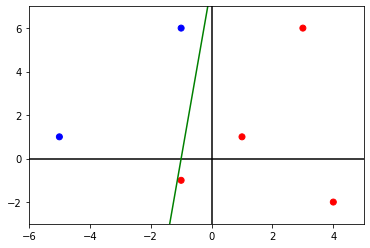

x : [1 1]
now weight:  [-8.  1.]
predict y : 0
e = 0 - 0 = 0
change W: [-8.  1.]+1*0*[1 1]= 
change b: [-8.]+1*0 = 
[-8.  1.]
[-8.]

8.0 -1.0


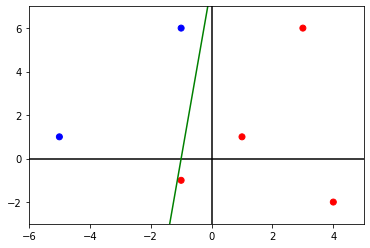

x : [ 4 -2]
now weight:  [-8.  1.]
predict y : 0
e = 0 - 0 = 0
change W: [-8.  1.]+1*0*[ 4 -2]= 
change b: [-8.]+1*0 = 
[-8.  1.]
[-8.]

8.0 -1.0


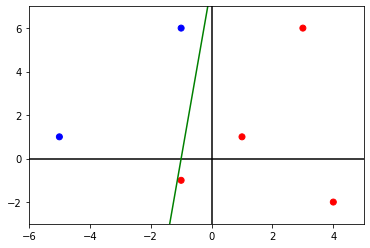

x : [-1 -1]
now weight:  [-8.  1.]
predict y : 0
e = 0 - 0 = 0
change W: [-8.  1.]+1*0*[-1 -1]= 
change b: [-8.]+1*0 = 
[-8.  1.]
[-8.]

8.0 -1.0


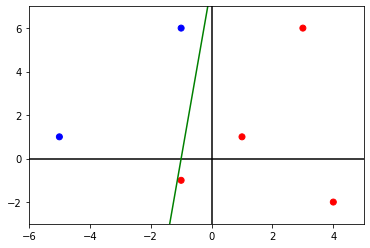

x : [-1  6]
now weight:  [-8.  1.]
predict y : 1
e = 1 - 1 = 0
change W: [-8.  1.]+1*0*[-1  6]= 
change b: [-8.]+1*0 = 
[-8.  1.]
[-8.]

8.0 -1.0


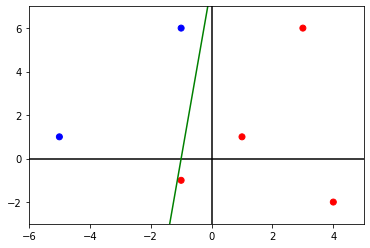

x : [-5  1]
now weight:  [-8.  1.]
predict y : 1
e = 1 - 1 = 0
change W: [-8.  1.]+1*0*[-5  1]= 
change b: [-8.]+1*0 = 
[-8.  1.]
[-8.]

8.0 -1.0


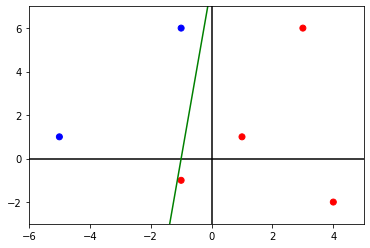

**********
using : 48  epoches .
[-8.  1.] [-8.]


In [26]:
if __name__ == '__main__':
    X = np.array([
        [3, 6],
        [1, 1],
        [4, -2],
        [-1, -1],
        [-1,6],
        [-5,1]
    ])
    d = np.array([0, 0, 0, 0 , 1, 1])
 
    perceptron = Perceptron(input_size=2)
    perceptron.fit(X, d)
    print(perceptron.W , perceptron.b)